In [1]:
#导入数据和第三方库
import pandas as pd
import numpy as np
#散点图
import seaborn as sns
#可视化
import matplotlib.pyplot as plt
%matplotlib inline
#建模第三方库
#经典线性模型
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression



In [2]:
data=pd.read_csv('C:/Users/GaoYi/jupyter-notebook/week2.redbook.csv')

In [3]:
data

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4
...,...,...,...,...,...,...,...,...
29447,43.19,NaN,NaN,NaN,C,0.94,545.180,1
29448,62.97,1.0,53.0,0.0,C,3.45,3738.912,1
29449,87.26,NaN,NaN,NaN,C,10.42,1279.530,0
29450,19.99,1.0,69.0,0.0,C,16.87,669.580,3


In [5]:
#统计数据表格缺失值的个数
data.isnull().sum()

revenue                        0
gender                     11729
age                        12736
engaged_last_30            11729
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64

In [6]:
#数据表格的统计分析
data.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [8]:
#将age的缺失值用中位数进行填充
data['age']=data['age'].fillna(data['age'].median())
#将gender的缺失值填充成哑变量，类似于空值
data['gender']=data['gender'].fillna('Unknown')
data['engaged_last_30']=data['engaged_last_30'].fillna('unknown')
#生成哑变量，进行数据转化
red1=pd.get_dummies(data)
red1

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_Unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,59.0,4.26,2343.870,0,0,1,0,1,0,0,0,1,0
1,200.99,51.0,0.94,8539.872,0,0,1,0,1,0,0,1,0,0
2,69.98,79.0,4.29,1687.646,1,0,1,0,1,0,0,0,0,1
3,649.99,60.0,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,60.0,21.13,3968.490,4,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29447,43.19,60.0,0.94,545.180,1,0,0,1,0,0,1,0,0,1
29448,62.97,53.0,3.45,3738.912,1,0,1,0,1,0,0,0,0,1
29449,87.26,60.0,10.42,1279.530,0,0,0,1,0,0,1,0,0,1
29450,19.99,69.0,16.87,669.580,3,0,1,0,1,0,0,0,0,1


In [9]:
red1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   age                      29452 non-null  float64
 2    days_since_last_order   29452 non-null  float64
 3   previous_order_amount    29452 non-null  float64
 4   3rd_party_stores         29452 non-null  int64  
 5   gender_0.0               29452 non-null  uint8  
 6   gender_1.0               29452 non-null  uint8  
 7   gender_Unknown           29452 non-null  uint8  
 8   engaged_last_30_0.0      29452 non-null  uint8  
 9   engaged_last_30_1.0      29452 non-null  uint8  
 10  engaged_last_30_unknown  29452 non-null  uint8  
 11  lifecycle_A              29452 non-null  uint8  
 12  lifecycle_B              29452 non-null  uint8  
 13  lifecycle_C              29452 non-null  uint8  
dtypes: float64(4), int64(1

<AxesSubplot:xlabel='age', ylabel='revenue'>

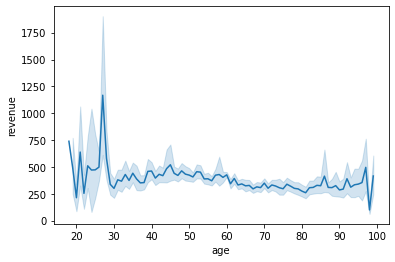

In [16]:
# 查看金额和年龄的关系（可视化）
sns.lineplot(x='age',y='revenue',data=data)


C:\Users\GaoYi\anaconda\envs\xiaohongshu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_order_amount', ylabel='revenue'>

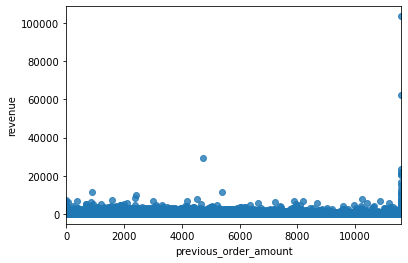

In [17]:
#线性关系可视化
sns.regplot('previous_order_amount','revenue',data)

C:\Users\GaoYi\anaconda\envs\xiaohongshu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='revenue'>

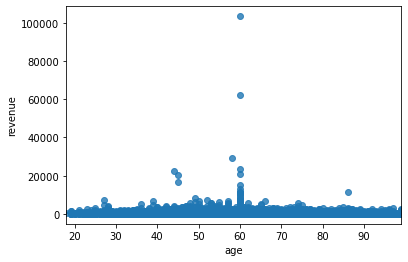

In [18]:
#年龄与销售额的线性关系
sns.regplot('age','revenue',data)

In [19]:
bins=[0,100,1000,1200,1500,2000,2500,5000,10000,20000,30000]
red1['revenue_level']=pd.cut(red1.revenue,bins,right=False)
red1.groupby('revenue_level').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
revenue_level,,,,,,,,
"[0, 100)",9970.0,56.737771,24.530894,0.02,35.9900,57.980,74.9900,99.99
"[100, 1000)",16761.0,369.924863,242.519685,100.00,158.1500,289.000,537.9900,999.99
"[1000, 1200)",796.0,1098.275573,59.316398,1000.06,1049.0000,1097.300,1149.6200,1199.99
"[1200, 1500)",755.0,1341.604563,88.727190,1200.00,1266.9850,1338.940,1415.9600,1499.99
"[1500, 2000)",584.0,1713.847178,142.700321,1500.01,1594.7950,1691.110,1827.6725,1999.95
"[2000, 2500)",272.0,2226.727537,148.325078,2000.04,2084.5000,2222.985,2345.9625,2499.99
"[2500, 5000)",260.0,3209.543423,605.455070,2501.84,2709.4625,3064.115,3543.0775,4970.42
"[5000, 10000)",39.0,6485.890769,1196.145429,5031.49,5545.2000,6301.930,7086.7800,9983.28
"[10000, 20000)",8.0,12667.082500,2159.356141,10689.11,11256.6300,11557.600,13775.4575,16500.00


In [20]:
# 模型构建
red1.corr()[['revenue']].sort_values('revenue',ascending=False)


,revenue
revenue,1.000000
previous_order_amount,0.168540
engaged_last_30_1.0,0.038287
days_since_last_order,0.036654
gender_Unknown,0.017722
engaged_last_30_unknown,0.017722
lifecycle_A,0.013683
lifecycle_C,-0.002221
lifecycle_B,-0.008651
gender_1.0,-0.012422


<AxesSubplot:>

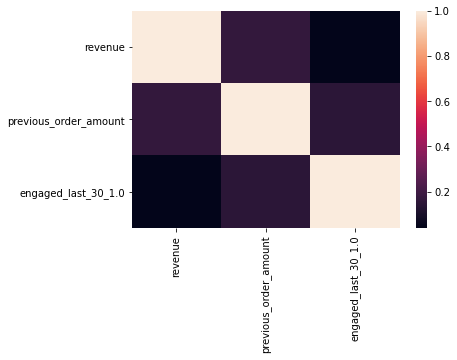

In [21]:
#热力图
q=['revenue','previous_order_amount','engaged_last_30_1.0']
sns.heatmap(red1[q].corr())

In [22]:
# 一元线性回归，只选择累计销售额作为自变量
# 因变量为销售额
model=LinearRegression()
y = red1['revenue']
x = red1[['previous_order_amount']]
model.fit(x,y) #模型拟合
# 查看拟合系数估计值
model.coef_


array([0.06800681])

In [23]:
# 查看截距项，获取标准线性回归结果
# 模型评分
score = model.score(x,y) 
score

0.02840574376132865

In [24]:
# 计算y的预测值
dictons = model.predict(x)
dictons

array([397.94563463, 819.31598642, 353.31793152, ..., 325.56326286,
       284.08250703, 381.56143314])

In [25]:
error = dictons - y


In [26]:
# 计算均方误差
rme = (error**2).mean()**0.5

In [27]:
# 计算平均绝对误差
mae = abs(error).mean()

In [28]:
print(rme)
print(mae)
 

946.4990744073566
356.9227080769107


In [29]:
# 标准的模型输出表
from statsmodels.formula.api import ols
model_ols=ols('y~x',red1).fit()
#观察coef-系数，P值显著性
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     861.0
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          1.43e-186
Time:                        13:52:54   Log-Likelihood:            -2.4362e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29450   BIC:                         4.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    238.5465      7.750     30.782      0.0

In [ ]:
# 结果：revenue=237.1796+0.0684*previous_order_amount，即用户以往累计的购买金额每增加1000元，它本次的的销售额就会增加68元；但R方非常低，需要寻找更好的模型。

C:\Users\GaoYi\anaconda\envs\xiaohongshu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

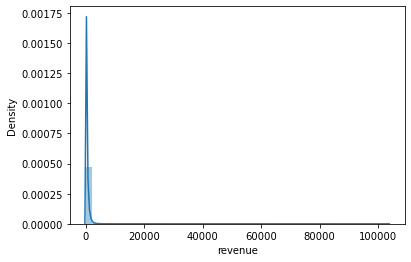

In [31]:
# 模型优化
# 模型优化的方向有：模型中增加变量，缺失值的填充调整，离群值的处理，数据分组等；

# 这里仅对revenue的离群值进行优化处理，使用直方图查看revenue的分布情况：

sns.distplot(red1['revenue'])

C:\Users\GaoYi\anaconda\envs\xiaohongshu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

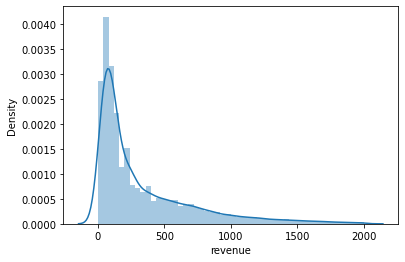

In [33]:
# 这里打算取revenue<=2000的值，先查看这部分数据在整体数据中的占比，发现超过98%，对整个数据集的影响较小；
red2 = red1[red1['revenue']<=2000]
sns.distplot(red2['revenue'])

In [35]:
model=LinearRegression()
y = red2['revenue']
x = red2[['previous_order_amount']]
model.fit(x,y) #模型拟合
# 查看拟合系数估计值
# 模型评分
score = model.score(x,y) 
score

0.029587877533860496

In [37]:
# 计算y的预测值
dictons = model.predict(x)
dictons
error = dictons - y
# 计算均方误差
rme = (error**2).mean()**0.5
# 计算平均绝对误差
mae = abs(error).mean()

In [38]:
print(rme)
print(mae)
# 结果显示，评分的变化不大，但均方根误差有明显下降，从之前的946下降到现在的372。
 

373.23779005815084
280.4609444310085


三、营销建议
分析发现，最近30天有在APP上参与重要活动的用户、注册后6个月之内的新用户、以往累计购买金额较多的用户，他们的平均消费额更高；对此提出以下营销建议：

1、针对新用户，可以举办拉新活动，增加新用户的数量来提升销售额的增长；

2、针对老用户，进行重要活动的消息推送，来吸引老用户多参与活动以提升销售额；

3、做好老用户的留存和促活，比如对于超过1个月没有消费的用户，可以发放消费券，刺激老用户回到平台进行消费；

4、数据显示男性用户的购买力也不可小觑，因此针对男性用户可以推送他们感兴趣的内容。

In [ ]:
舆情分析 风控管理 金融证券预测 风险评估 。。。